<a href="https://colab.research.google.com/github/yjyuwisely/Bigdata-project/blob/main/210825_EDA_for_jewerly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [3]:
# =============================================================================
# JEWELRY DATASET EDA
# =============================================================================

print("="*60)
print("JEWELRY DATASET - EXPLORATORY DATA ANALYSIS")
print("="*60)

# 1. LOAD AND INITIAL INSPECTION
# Load the jewelry dataset with id as index (following groupmate's style)
df = pd.read_csv('jewelry.csv', index_col='id')

print("\n1. BASIC DATA OVERVIEW")
print("-" * 40)

# Display basic information about the dataset
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

JEWELRY DATASET - EXPLORATORY DATA ANALYSIS

1. BASIC DATA OVERVIEW
----------------------------------------
Dataset Shape: (4853, 21)
Columns: ['category', 'subcategory', 'name', 'current_price', 'raw_price', 'currency', 'discount', 'likes_count', 'is_new', 'brand', 'brand_url', 'codCountry', 'variation_0_color', 'variation_1_color', 'variation_0_thumbnail', 'variation_0_image', 'variation_1_thumbnail', 'variation_1_image', 'image_url', 'url', 'model']


In [4]:
# Show first few rows to understand data structure
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
        category         subcategory                                name  \
id                                                                         
1692610  jewelry  Montres connectées    Global Version Xiaomi Mi bande 5   
1513785  jewelry            Colliers  Collier long pendentif géométrique   
1409396  jewelry  Montres connectées         Montre intelligente ECG EKG   
1689722  jewelry            Colliers           Collier à pampilles blanc   
1674308  jewelry  Boucles d'oreilles     Clips d'oreilles en verre gemme   

         current_price  raw_price currency  discount  likes_count  is_new  \
id                                                                          
1692610          42.99      99.99      USD        57           27   False   
1513785          17.61      33.55      USD        48          518   False   
1409396          66.29     166.14      USD        60          505   False   
1689722           9.99      24.99      USD        60          140  

In [5]:
# Get detailed info about data types and non-null counts
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4853 entries, 1692610 to 1595288
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   category               4853 non-null   object 
 1   subcategory            4853 non-null   object 
 2   name                   4853 non-null   object 
 3   current_price          4853 non-null   float64
 4   raw_price              4853 non-null   float64
 5   currency               4853 non-null   object 
 6   discount               4853 non-null   int64  
 7   likes_count            4853 non-null   int64  
 8   is_new                 4853 non-null   bool   
 9   brand                  559 non-null    object 
 10  brand_url              555 non-null    object 
 11  codCountry             4304 non-null   object 
 12  variation_0_color      3686 non-null   object 
 13  variation_1_color      2475 non-null   object 
 14  variation_0_thumbnail  3686 non-null 

In [6]:
# Statistical summary for numeric columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       current_price    raw_price     discount  likes_count
count    4853.000000  4853.000000  4853.000000  4853.000000
mean       16.452732    34.999666    53.131877   166.145889
std        24.289653    50.370003    11.166705   294.635126
min         0.260000     0.000000     0.000000     0.000000
25%         7.840000    17.830000    48.000000    37.000000
50%        10.350000    21.880000    50.000000    83.000000
75%        16.260000    33.320000    58.000000   177.000000
max       601.790000  1223.990000    98.000000  5966.000000


In [7]:
# 2. DATA QUALITY CHECK
print("\n2. DATA QUALITY ASSESSMENT")
print("-" * 40)

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count}")


2. DATA QUALITY ASSESSMENT
----------------------------------------

Duplicate rows: 67


In [8]:
# 3. FEATURE ENGINEERING (Following groupmate's approach)
print("\n3. FEATURE ENGINEERING")
print("-" * 40)

# Create value_gap feature (savings amount)
df['value_gap'] = df['raw_price'] - df['current_price']
print("Created 'value_gap' = raw_price - current_price")

# Create value_ratio feature (price efficiency)
df['value_ratio'] = df['current_price'] / df['raw_price']
print("Created 'value_ratio' = current_price / raw_price")


3. FEATURE ENGINEERING
----------------------------------------
Created 'value_gap' = raw_price - current_price
Created 'value_ratio' = current_price / raw_price


In [9]:
# Display summary of new features
print("\nNew Features Summary:")
print(df[['value_gap', 'value_ratio']].describe())


New Features Summary:
         value_gap  value_ratio
count  4853.000000  4853.000000
mean     18.546934          inf
std      27.428464          NaN
min     -16.990000     0.018495
25%       9.230000     0.423986
50%      11.600000     0.497199
75%      17.860000     0.525043
max     699.890000          inf


In [10]:
# 4. IDENTIFY ANALYTICAL COLUMNS
print("\n4. COLUMN CLASSIFICATION")
print("-" * 40)

# Define columns for different purposes (following assignment requirements)
numerical_cols = ['current_price', 'raw_price', 'discount', 'likes_count', 'value_gap', 'value_ratio']
categorical_cols = ['category', 'subcategory', 'brand']
discussion_cols = ['name', 'color', 'thumbnail', 'url']  # For discussion only, not analytics

print(f"Numerical columns for analysis: {numerical_cols}")
print(f"Categorical columns for grouping: {categorical_cols}")
print(f"Discussion-only columns: {discussion_cols}")


4. COLUMN CLASSIFICATION
----------------------------------------
Numerical columns for analysis: ['current_price', 'raw_price', 'discount', 'likes_count', 'value_gap', 'value_ratio']
Categorical columns for grouping: ['category', 'subcategory', 'brand']
Discussion-only columns: ['name', 'color', 'thumbnail', 'url']


In [12]:
# 5. UNIVARIATE ANALYSIS - NUMERICAL FEATURES
print("\n5. NUMERICAL FEATURES ANALYSIS")
print("-" * 40)

# First, let's check for infinite values and extreme outliers
print("Checking for infinite values and outliers:")
for col in numerical_cols:
    if col in df.columns:
        inf_count = np.isinf(df[col]).sum()
        nan_count = df[col].isna().sum()
        print(f"{col}: {inf_count} infinite values, {nan_count} NaN values")
        print(f"  Min: {df[col].min()}, Max: {df[col].max()}")

# Function to create histograms for all numerical columns (FIXED VERSION)
def display_hist(df, cols, n_cols=3, plot='hist'):
    """Create histogram plots for numerical columns - handles inf values"""
    # Filter out columns that don't exist in the dataframe
    available_cols = [col for col in cols if col in df.columns]
    num_plots = len(available_cols)

    if num_plots == 0:
        print("No numerical columns available for plotting")
        return

    n_rows = (num_plots + n_cols - 1) // n_cols  # ceiling division

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))

    # Handle single subplot case
    if num_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if hasattr(axes, '__len__') else [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(available_cols):
        # Clean the data: remove inf, -inf, and NaN values
        clean_data = df[col].replace([np.inf, -np.inf], np.nan).dropna()

        if len(clean_data) == 0:
            axes[i].text(0.5, 0.5, f'No valid data\nfor {col}',
                        ha='center', va='center', transform=axes[i].transAxes)
            axes[i].set_title(f"Distribution of {col}")
        else:
            # Use robust binning to handle outliers
            try:
                # Remove extreme outliers (beyond 99.5th percentile)
                q99 = clean_data.quantile(0.995)
                q1 = clean_data.quantile(0.005)
                filtered_data = clean_data[(clean_data >= q1) & (clean_data <= q99)]

                if len(filtered_data) > 0:
                    axes[i].hist(filtered_data, bins=30, alpha=0.7, edgecolor='black')
                    axes[i].set_title(f"Distribution of {col}\n(outliers removed)")
                else:
                    axes[i].hist(clean_data, bins=10, alpha=0.7, edgecolor='black')
                    axes[i].set_title(f"Distribution of {col}")

                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frequency')

            except Exception as e:
                axes[i].text(0.5, 0.5, f'Error plotting\n{col}:\n{str(e)[:50]}...',
                            ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f"Distribution of {col}")

    # Hide unused subplots
    for j in range(num_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Clean the numerical columns before plotting
print("\nCleaning data before visualization...")

# Replace infinite values with NaN
for col in numerical_cols:
    if col in df.columns:
        inf_mask = np.isinf(df[col])
        if inf_mask.any():
            print(f"Replacing {inf_mask.sum()} infinite values in {col} with NaN")
            df[col] = df[col].replace([np.inf, -np.inf], np.nan)


5. NUMERICAL FEATURES ANALYSIS
----------------------------------------
Checking for infinite values and outliers:
current_price: 0 infinite values, 0 NaN values
  Min: 0.26, Max: 601.79
raw_price: 0 infinite values, 0 NaN values
  Min: 0.0, Max: 1223.99
discount: 0 infinite values, 0 NaN values
  Min: 0, Max: 98
likes_count: 0 infinite values, 0 NaN values
  Min: 0, Max: 5966
value_gap: 0 infinite values, 0 NaN values
  Min: -16.99, Max: 699.8900000000001
value_ratio: 57 infinite values, 0 NaN values
  Min: 0.018494897959183673, Max: inf

Cleaning data before visualization...
Replacing 57 infinite values in value_ratio with NaN


Displaying histograms for numerical features...


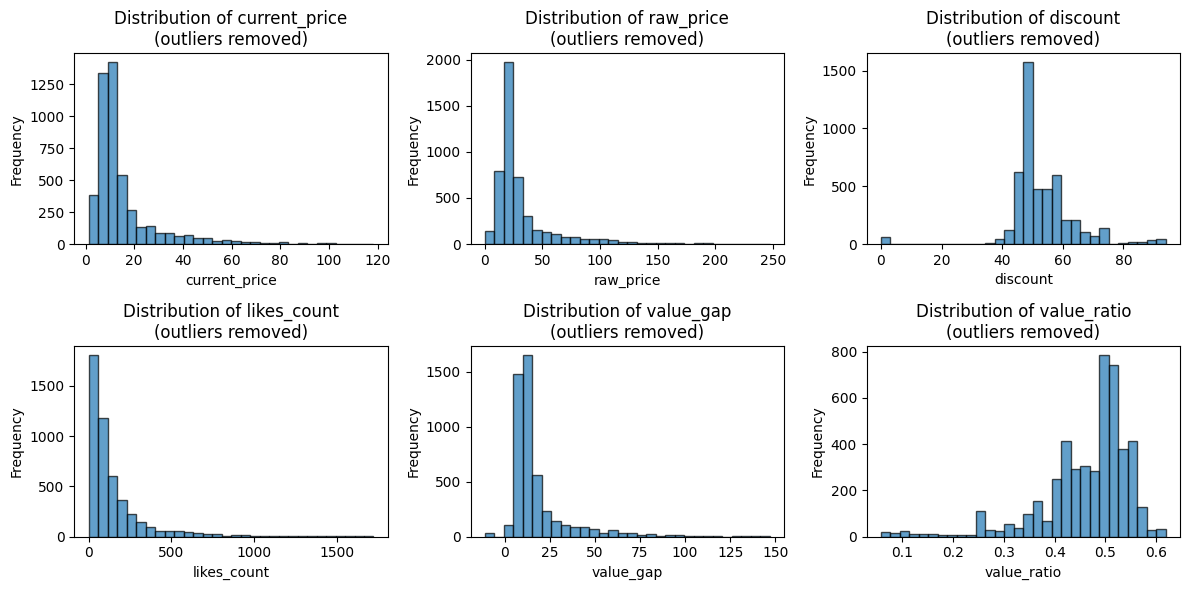


Summary after cleaning:
current_price: 4853/4853 valid values (100.0%)
raw_price: 4853/4853 valid values (100.0%)
discount: 4853/4853 valid values (100.0%)
likes_count: 4853/4853 valid values (100.0%)
value_gap: 4853/4853 valid values (100.0%)
value_ratio: 4796/4853 valid values (98.8%)


In [13]:
# Display histograms for all numerical features
print("Displaying histograms for numerical features...")
display_hist(df, numerical_cols)

# Optional: Show summary of cleaned data
print("\nSummary after cleaning:")
for col in numerical_cols:
    if col in df.columns:
        valid_count = df[col].notna().sum()
        total_count = len(df[col])
        print(f"{col}: {valid_count}/{total_count} valid values ({valid_count/total_count*100:.1f}%)")


6. BIVARIATE ANALYSIS
----------------------------------------
Displaying scatter plots vs likes_count...


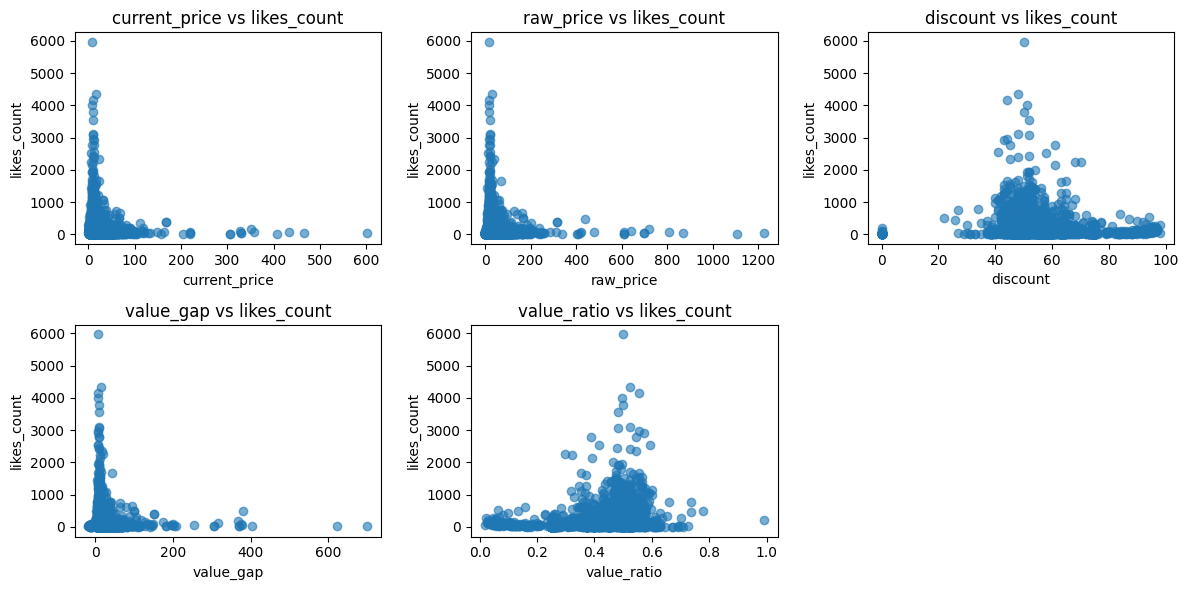

In [14]:
# 6. BIVARIATE ANALYSIS - SCATTER PLOTS
print("\n6. BIVARIATE ANALYSIS")
print("-" * 40)

# Function to create scatter plots against likes_count (following groupmate's style)
def display_scatter(df, y='likes_count', n_cols=3):
    """Create scatter plots of features vs likes_count"""
    numeric_df = df[numerical_cols].select_dtypes(include=['int64', 'float64'])
    keys_excl_y = [col for col in numeric_df.columns if col != y]
    num_plots = len(keys_excl_y)
    n_rows = (num_plots + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, col in enumerate(keys_excl_y):
        axes[i].scatter(df[col], df[y], alpha=0.6)
        axes[i].set_title(f"{col} vs {y}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(y)

    # Hide unused subplots
    for j in range(num_plots, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Display scatter plots
print("Displaying scatter plots vs likes_count...")
display_scatter(df)


7. CORRELATION ANALYSIS
----------------------------------------
Correlation Matrix:
               current_price  raw_price  discount  likes_count  value_gap  \
current_price       1.000000   0.970520 -0.131276    -0.051489   0.896712   
raw_price           0.970520   1.000000  0.019983    -0.061912   0.976956   
discount           -0.131276   0.019983  1.000000    -0.079516   0.152950   
likes_count        -0.051489  -0.061912 -0.079516     1.000000  -0.068100   
value_gap           0.896712   0.976956  0.152950    -0.068100   1.000000   
value_ratio         0.167235   0.023290 -0.999500     0.123355  -0.106182   

               value_ratio  
current_price     0.167235  
raw_price         0.023290  
discount         -0.999500  
likes_count       0.123355  
value_gap        -0.106182  
value_ratio       1.000000  


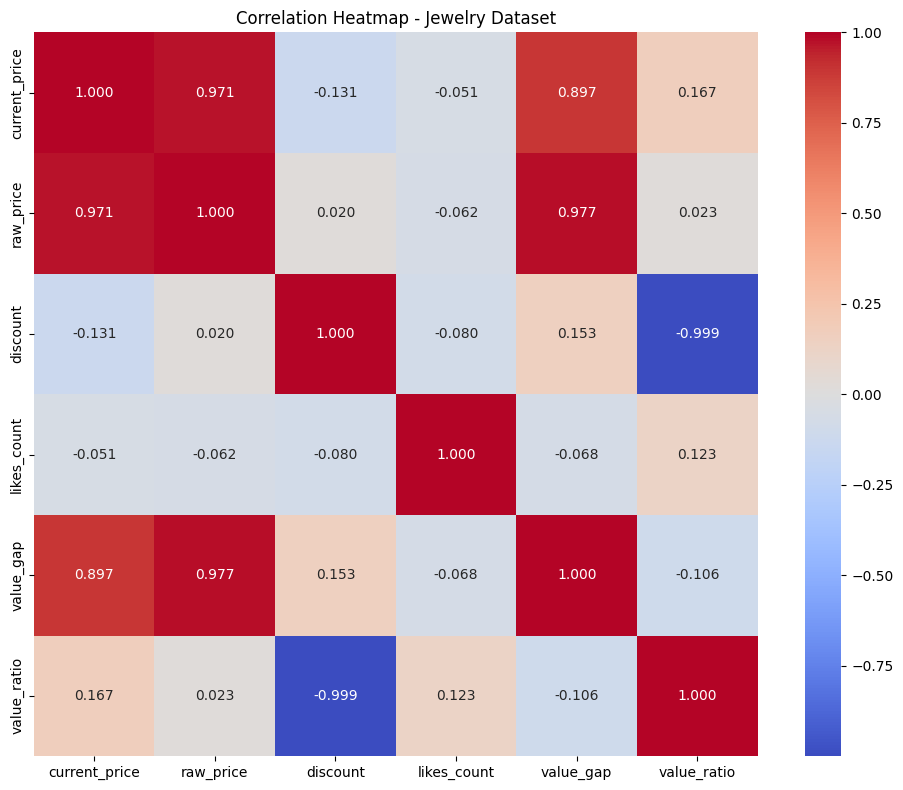

In [15]:
# 7. CORRELATION ANALYSIS
print("\n7. CORRELATION ANALYSIS")
print("-" * 40)

# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Correlation Heatmap - Jewelry Dataset')
plt.tight_layout()
plt.show()

In [16]:
# Identify high correlations (following groupmate's insight)
print("\nHigh correlations identified:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # High correlation threshold
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f}")


High correlations identified:
current_price - raw_price: 0.971
current_price - value_gap: 0.897
raw_price - value_gap: 0.977
discount - value_ratio: -0.999


In [17]:
# 8. CATEGORICAL FEATURES ANALYSIS
print("\n8. CATEGORICAL FEATURES ANALYSIS")
print("-" * 40)

# Analyze categorical columns if they exist
for col in categorical_cols:
    if col in df.columns and df[col].notna().sum() > 0:
        print(f"\nTop 10 {col} by count:")
        print(df[col].value_counts().head(10))
    else:
        print(f"\n{col} column not available or empty")


8. CATEGORICAL FEATURES ANALYSIS
----------------------------------------

Top 10 category by count:
category
jewelry    4853
Name: count, dtype: int64

Top 10 subcategory by count:
subcategory
Boucles d'oreilles         1097
Colliers                    759
Bracelets                   496
Montres pour homme          425
Bagues                      371
Montres pour femme          352
Bracelets pour homme        194
Montres connectées          163
Accessoires des cheveux     148
Sets de bijoux              135
Name: count, dtype: int64

Top 10 brand by count:
brand
Bakeey        96
SKMEI         41
JASSY         36
CURREN        35
CRRJU         30
DEFFRUN       21
YUEYIN        18
MINI FOCUS    17
YAZOLE        17
LONGBO        14
Name: count, dtype: int64


In [18]:
# 9. PRODUCT SCORING MODEL (Following groupmate's approach)
print("\n9. PRODUCT SCORING MODEL")
print("-" * 40)

# Prepare features for scoring (discount and likes_count as per groupmate's model)
scoring_features = ['discount', 'likes_count']

# Apply MinMax scaling to scoring features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[scoring_features].fillna(0))

# Create scaled feature columns
df['scaled_discount'] = scaled_features[:, 0]
df['scaled_likes'] = scaled_features[:, 1]

print("Applied MinMax scaling to discount and likes_count")

# Calculate product score (following groupmate's 50-50 weighting)
df['product_score'] = 0.5 * df['scaled_discount'] + 0.5 * df['scaled_likes']

print("Created product_score = 0.5 * scaled_discount + 0.5 * scaled_likes")


9. PRODUCT SCORING MODEL
----------------------------------------
Applied MinMax scaling to discount and likes_count
Created product_score = 0.5 * scaled_discount + 0.5 * scaled_likes


In [19]:
# 10. TOP 10 PRODUCTS IDENTIFICATION
print("\n10. TOP 10 PRODUCTS BY SCORE")
print("-" * 40)

# Select relevant columns for top products display
display_cols = ['name', 'subcategory', 'brand', 'current_price', 'raw_price',
                'discount', 'likes_count', 'product_score']

# Get available columns (some might not exist in the dataset)
available_display_cols = [col for col in display_cols if col in df.columns]

# Get top 10 products by score
top_10_products = df.nlargest(10, 'product_score')[available_display_cols]

print("Top 10 Products by Product Score:")
print(top_10_products)


10. TOP 10 PRODUCTS BY SCORE
----------------------------------------
Top 10 Products by Product Score:
                                                      name  \
id                                                           
1345485              Bracelet multicouche unisexe vintage    
1107607          Boucles d'oreilles Vintage en Argent S925   
1082097  10pcs Bague Unique Vintage Ethnique Anneau D'a...   
987169        Boucles d'oreilles en argent 925 avec zircon   
1023192  1 Paire De Boucles d'oreilles À LED Clous D'or...   
1059683  Boucles D'oreilles Ornées Strass Cristal En Ac...   
1327053                       Collier à pendentif d'oiseau   
960432   Bracelet Multi-tour Cuir Avec Trangle Hibou Ailes   
1385203              Boucles d'oreilles en spirale de mode   
1231646                  Charmant boucles d'oreilles hibou   

                subcategory brand  current_price  raw_price  discount  \
id                                                                      
1345

In [20]:
# 11. SUMMARY STATISTICS AND INSIGHTS
print("\n11. KEY INSIGHTS AND SUMMARY")
print("-" * 40)

# Price analysis
print(f"Price Range: ${df['current_price'].min():.2f} - ${df['current_price'].max():.2f}")
print(f"Average Price: ${df['current_price'].mean():.2f}")
print(f"Median Price: ${df['current_price'].median():.2f}")

# Discount analysis
print(f"\nDiscount Range: {df['discount'].min()}% - {df['discount'].max()}%")
print(f"Average Discount: {df['discount'].mean():.1f}%")

# Popularity analysis
print(f"\nLikes Range: {df['likes_count'].min()} - {df['likes_count'].max()}")
print(f"Average Likes: {df['likes_count'].mean():.1f}")

# Category analysis (if subcategory exists)
if 'subcategory' in df.columns:
    most_popular_subcat = df['subcategory'].value_counts().index[0]
    print(f"\nMost Common Subcategory: {most_popular_subcat}")

# Score distribution
print(f"\nProduct Score Range: {df['product_score'].min():.3f} - {df['product_score'].max():.3f}")
print(f"Average Product Score: {df['product_score'].mean():.3f}")


11. KEY INSIGHTS AND SUMMARY
----------------------------------------
Price Range: $0.26 - $601.79
Average Price: $16.45
Median Price: $10.35

Discount Range: 0% - 98%
Average Discount: 53.1%

Likes Range: 0 - 5966
Average Likes: 166.1

Most Common Subcategory: Boucles d'oreilles

Product Score Range: 0.000 - 0.755
Average Product Score: 0.285



12. FINAL VISUALIZATION
----------------------------------------


Text(0, 0.5, 'Number of Products')

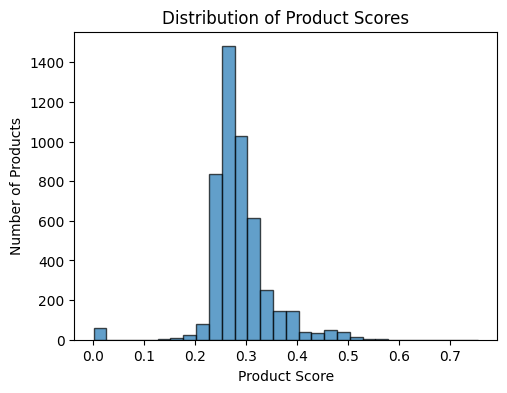

In [21]:
# 12. FINAL VISUALIZATION - PRODUCT SCORE DISTRIBUTION
print("\n12. FINAL VISUALIZATION")
print("-" * 40)

plt.figure(figsize=(12, 4))

# Product score histogram
plt.subplot(1, 2, 1)
plt.hist(df['product_score'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Product Scores')
plt.xlabel('Product Score')
plt.ylabel('Number of Products')

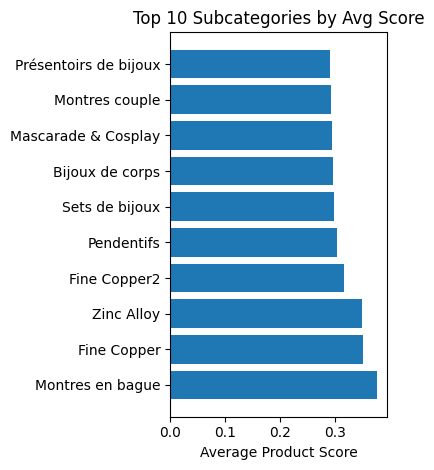


EDA COMPLETE - Ready for clustering and classification!


In [22]:
# Top subcategories by average score (if available)
plt.subplot(1, 2, 2)
if 'subcategory' in df.columns:
    subcat_scores = df.groupby('subcategory')['product_score'].mean().sort_values(ascending=False).head(10)
    plt.barh(range(len(subcat_scores)), subcat_scores.values)
    plt.yticks(range(len(subcat_scores)), subcat_scores.index)
    plt.title('Top 10 Subcategories by Avg Score')
    plt.xlabel('Average Product Score')
else:
    plt.text(0.5, 0.5, 'Subcategory data not available',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Subcategory Analysis')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("EDA COMPLETE - Ready for clustering and classification!")
print("="*60)